
<img src="http://www.nserc-crsng.gc.ca/_gui/wmms.gif" alt="Canada logo" align="right">

<br>

<img src="http://www.triumf.ca/sites/default/files/styles/gallery_large/public/images/nserc_crsng.gif?itok=H7AhTN_F" alt="NSERC logo" align="right" width = 90>



# Exploring NSERC Awards Data


Canada's [Open Government Portal](http://open.canada.ca/en) includes [NSERC Awards Data](http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e) from 1991 through 2016.

The awards data (in .csv format) were copied to an [Amazon Web Services S3 bucket](http://docs.aws.amazon.com/AmazonS3/latest/dev/UsingBucket.html). This open Jupyter notebook starts an exploration of the NSERC investment portfolio during the 1995 -- 2016 epoch. If you'd like access to the data hosted on S3, please contact [James Colliander](http://colliand.com).)

> **Acknowledgement:** I thank [Ian Allison](https://github.com/ianabc) and [James Colliander](http://colliand.com) of the [Pacific Institute for the Mathematical Sciences](http://www.pims.math.ca/) for building the [JupyterHub service](https://pims.jupyter.ca) and for help with this notebook. -- I. Heisz

## Variables you Can Modify

In [8]:
startYear = 1995
endYear   = 2017  # The end year is not included so write the last year you want + 1

institution = 'University of British Columbia'

## Import the Data

In [3]:
import numpy as np
import pandas as pd
import sys

df = pd.DataFrame()

## Reads and processes the raw csv datafiles from NSERC, stored in Amazon s3.
for year in range(startYear, endYear):
    file = 'https://s3.ca-central-1.amazonaws.com/open-data-ro/NSERC/NSERC_GRT_FYR' + str(year) + '_AWARD.csv.gz'
    df = df.append(pd.read_csv(file, compression='gzip', usecols = [4, 9, 11, 17], encoding='latin-1'))
    
    # Prints the year name of each file that is processed.
    print(year)
    
## Rename columns for better readability.
df.columns = ['Institution', 'FiscalYear', 'AwardAmount', 'Committee']  

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [25]:
df.head()

,Institution,FiscalYear,AwardAmount,Committee
0,Queen's University,1995,41400,18
1,University of Alberta,1995,14000,16
2,University of Alberta,1995,5755,147
3,McGill University,1995,10380,146
4,GE Glegg Water Technologies Inc.,1995,3600,146


### Data for the Selected Institution and Fixed Committee
re-run this cell and all cells below this if you select a new institution

In [30]:
## Get the data for committee 1508
committee = 1508
tempData = df.loc[(df['Committee'] == committee)]

## Get the data for the chosen institution
mathFundingData = mathFundingData.loc[(mathFundingData['Institution'] == institution)]

# A sample of the data imported
mathFundingData.head()

,Institution,FiscalYear,AwardAmount,Committee
5722,University of British Columbia,2009,48530,1508
140,University of British Columbia,2010,40000,1508
569,University of British Columbia,2010,24000,1508
7093,University of British Columbia,2010,24000,1508
7203,University of British Columbia,2010,20000,1508


## Total Awards Granted Per Year 
Note: Committee 1508 for Mathematics and Statistics was created in 2009 so there is no pre-2009 data on it.

In [31]:
# The sum of all awards for each individual year
awardSums = mathFundingData.groupby(['FiscalYear'])['AwardAmount'].transform('sum')

# Make a new column called 'TotalAward' to show the awardSums
awardTotalsByYear = mathFundingData.assign(TotalAward = awardSums)

# Count the number of awards given in each year
awardsGiven = awardTotalsByYear.groupby('FiscalYear').cumcount() + 1

# Make a new column called 'AwardCount' to show the awardsGiven  
awardTotalsByYear = awardTotalsByYear.assign(AwardCount=awardsGiven)

# Drop all but the last of duplicate years, now that we have the award amount info from them. 
# We keep the last one because that is where the final value of cumCount for the number of awards given is.
deduplicatedData = awardTotalsByYear.drop_duplicates(subset = 'FiscalYear', keep = 'last')

deduplicatedData[['FiscalYear','TotalAward', 'AwardCount']] 

,FiscalYear,TotalAward,AwardCount
5722,2009,48530,1
22643,2010,311089,13
23222,2011,627615,30
23539,2012,1080991,45
13200,2013,1401000,58
24171,2014,1597852,68
24428,2015,1725520,73
25034,2016,1766000,67


## Plots of the Data

In [32]:
## Imports necessary for plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#Plotly for interactive plotting
!pip3 install plotly --user; 
import plotly.plotly as py
import plotly.graph_objs as go

### Plot of the Award Distribution for All Years

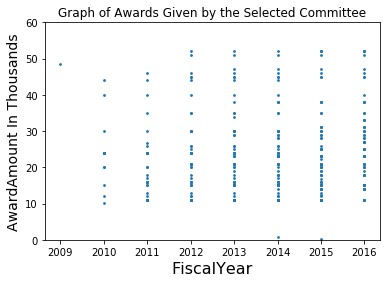

In [38]:
## Plot Settings, modifiable variables
data = mathFundingData

xAxis = 'FiscalYear'
yAxis = 'AwardAmount'

# This will probably need adjustment if you change years or committees
yAxisRange = [0,60]
yScalingFactor = 10**3
yScalingFactorString = ' In Thousands'

plotPointSizes = 3 

title = 'Graph of Awards Given by the Selected Committee'

## Make the Plot
axes = plt.gca()
x = data[xAxis]
plt.xlabel(xAxis, fontsize=16)

y = data[yAxis]
plt.ylabel(yAxis+yScalingFactorString, fontsize=14)
axes.set_ylim(yAxisRange)
y = y/yScalingFactor

plt.title(title)

plot = plt.scatter(x,y,s=plotPointSizes)

plt.show()

### Plot of the Award Distribution for a Selected Year

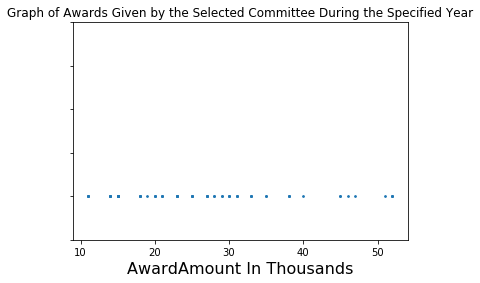

In [39]:
## Plot Settings, modifiable variables
year = 2016
data = mathFundingData.loc[(mathFundingData['FiscalYear'] == year)]

yAxis = 'FiscalYear'
xAxis = 'AwardAmount'

xScalingFactor = 10**3
xScalingFactorString = ' In Thousands'

# This will probably need adjustment if you change years or committees
yAxisRange = [0,10000]

plotPointSizes = 3 

title = 'Graph of Awards Given by the Selected Committee During the Specified Year'

## Make the Plot
axes = plt.gca()
x = data[xAxis]
x = x/xScalingFactor
plt.xlabel(xAxis+xScalingFactorString, fontsize=16)

y = data[yAxis]
axes.set_ylim(yAxisRange)
axes.set_yticklabels([]) # make it so the y axis is not numbered

plt.title(title)

plot = plt.scatter(x,y,s=plotPointSizes)

plt.show()